<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10

In this lab we covered:
1. Sampling distribution of the sample mean
2. Central limit theorem

## Sampling Distribution

The sampling distribution of a statistic is the distribution of values taken by the statistic in all possible samples of the same size from the same population.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

### Creating the population values

- First we generate two normal distributions of mass values for males and females.
- Then we concatenate these two arrays and create the dataframe `df_mass`.

**np.random.normal:**
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [2]:
np.random.seed(0)
male_mass = np.random.normal(loc = 180, scale = 30, size = 2000)
female_mass = np.random.normal(loc = 140, scale = 20, size = 2000)

**np.concatenate:** https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

In [3]:
all_values = np.concatenate((male_mass, female_mass), axis = 0)
df_mass = pd.DataFrame({'people_mass': all_values})

In [4]:
df_mass.size

4000

In [5]:
# Let's see the first 5 rows of the dataframe.
df_mass.head()

,people_mass
0,232.921570
1,192.004716
2,209.362140
3,247.226796
4,236.026740


In [6]:
# Calculating summary statistics for the variable "people_mass"
df_mass.describe()

,people_mass
count,4000.000000
mean,159.411846
std,32.087054
min,65.197987
25%,135.918187
50%,155.533992
75%,180.564731
max,275.129243


Let's look at the distribution of the combined samples. Is is normal?

**sns.set_theme:** https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

**sns.histplot:** https://seaborn.pydata.org/generated/seaborn.histplot.html

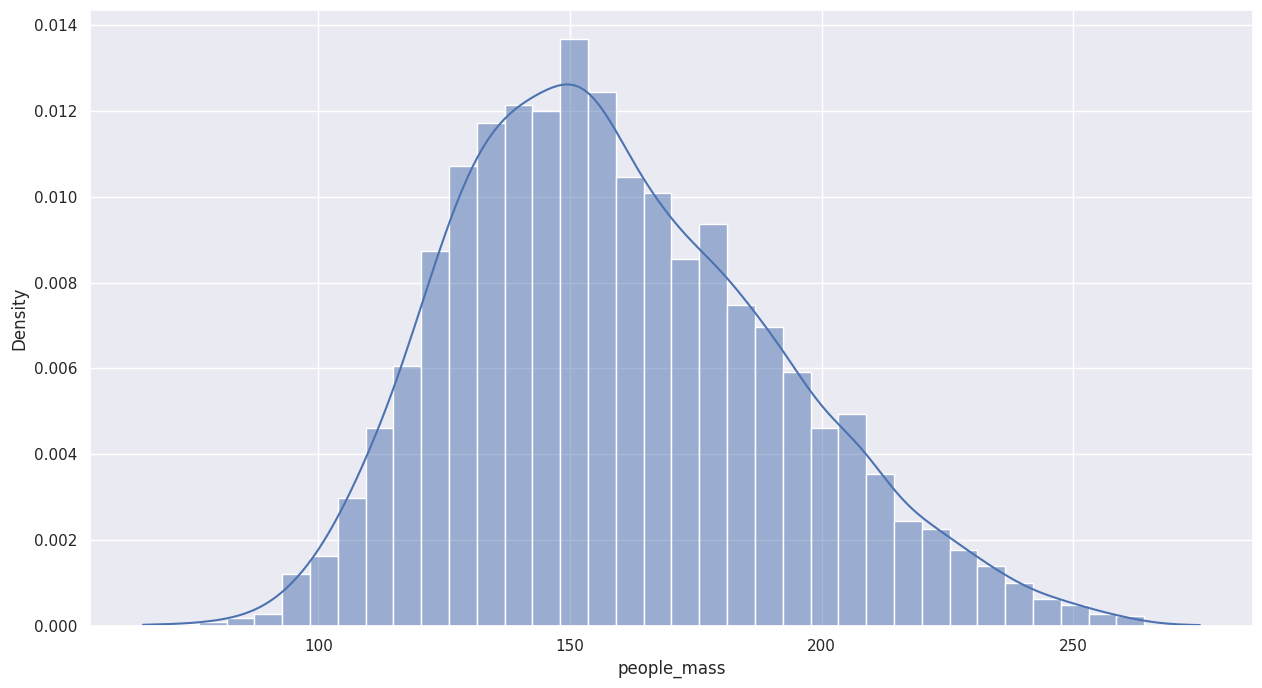

In [7]:
sns.set_theme(rc = {'figure.figsize':(15, 8)})
sns.histplot(df_mass['people_mass'], stat = 'density', kde = True)
plt.show()

### Sampling distribution of the sample mean $\bar{X}$

If the population distribution is Normal, then so is the sampling distribution of the sample mean. However,
most population distributions are not Normal.

A result we have is that as the sample size increases, the distribution of sample means changes its shape: It looks less like that of the population and more like a Normal distribution.

Suppose that $\bar{X}$ is the mean of a SRS with size n drawn from a population with mean $\mu$ and standard deviation $\sigma$. Then the sampling distribution of $\bar{X}$ has mean $\mu$ and standard deviation $\sigma/\sqrt(n)$.

**Central Limit Theorem (CLT):** Draw an SRS of size n from any population with mean $\mu$ and finite standard deviation $\sigma$. The CLT says that when n is large, the sampling distribution of the sample mean $\bar{X}$ is approximately Normal. That is,
$\bar{X} \sim N(\mu, \sigma/\sqrt(n)$  

Let's play with this result using the population values we created at the beginning of this lab.

Here is a function for creating a list of sample means:
- The number of samples is "n_samples" and size of each sample is "sample_size".
- We calculate the mean of each sample and store all those sample mean values in the list "sample_means".
- Samples are drawn with replacement, but for our large population size (4K) we could have used replace = False.
- When the population size is small relative to the sample sample size you want then it is important to set replace = True.

**np.random.choice:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [8]:
# Function for creating a sequence of sample means
def sample_mean_calculator(population_array, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(population_array, size = sample_size, replace = False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

In [9]:
# Calculating 1000 sample means from 1000 samples each of size 10
sample_means_10 = sample_mean_calculator(df_mass['people_mass'], 10, 1000)

In [10]:
# Calculating 1000 sample means from 1000 samples each of size 30
sample_means_30 = sample_mean_calculator(df_mass['people_mass'], 30, 1000)

In [14]:
# Calculating 1000 sample means from 1000 samples each of size 100
sample_means_100 = sample_mean_calculator(df_mass['people_mass'], 100, 1000)

In [11]:
# Calculating 1000 sample means from 1000 samples each of size 200
sample_means_200 = sample_mean_calculator(df_mass['people_mass'], 200, 1000)

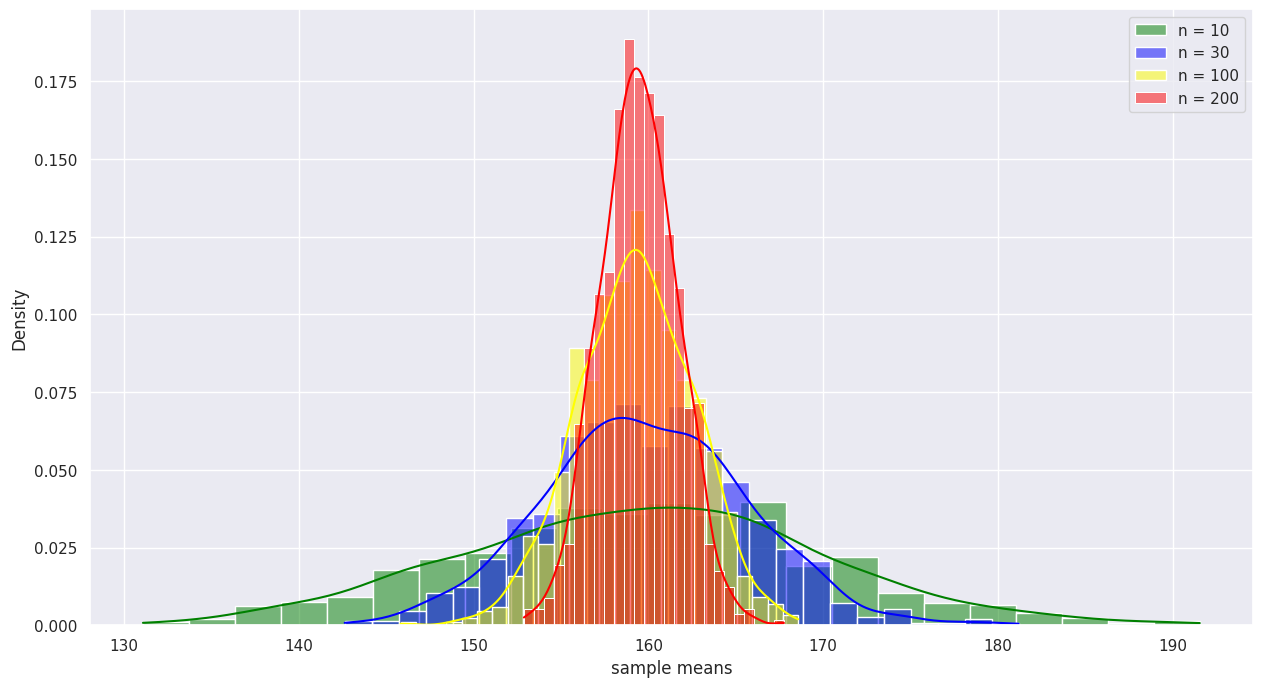

In [15]:
# Let's view the distribution of the sample means values
sns.histplot(sample_means_10, stat = 'density', color = "green",
             label = "n = 10", kde = True)
sns.histplot(sample_means_30, stat = 'density', color = "blue",
             label = "n = 30", kde = True)
sns.histplot(sample_means_100, stat = 'density', color = "yellow",
             label = "n = 100", kde = True)
sns.histplot(sample_means_200, stat = 'density', color = "red",
             label = "n = 200", kde = True)
plt.xlabel("sample means")
plt.legend()
plt.show()

- The red curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean.
- Sampling a sufficient number of times with a sufficient size will result in a normal distribution of sample means.

Let's check the mean of `sample_means_200`. We know that if the sample size is large enough the mean of the sample means should be close to the population mean $\mu$.

In [16]:
np.mean(sample_means_200)

np.float64(159.4504254734991)

- We see that the sample mean of the sample means (sample size 200) is close to population mean ($\mu = 160$)

In [17]:
# Let's check the standard deviation of sample_means_200.
np.std(sample_means_200, ddof = 1)

np.float64(2.1796054721929936)

Let's compare this estimate with respect to the population standard deviation of the sample mean (of sample size 200) distribution

- The standard deviation of sample means is called the standard error (SE).
- We can calculate the standard error by just using the standard deviation of "people_mass" and sample size.

In [18]:
sigma = np.std(df_mass['people_mass'])

In [19]:
SE = sigma / np.sqrt(200)
SE

np.float64(2.2686136981118272)

- We see that SE is roughly equal to the standard deviation of sample_means_200.

Let n be 100 from the CLT we have that $\bar{X} \sim N(160, 32.08/\sqrt(100)$. We can then compute some probabilites using the normal distribution.

#### What is the probability of $\bar{X} < 150$ ?

Recall the `norm.cdf` function from Lab 4 to compute this probability.

In [ ]:
norm.cdf(150, loc = 160, scale = 32.08/10)

**Practice:** What is the probaility that $\bar{X} > 160$?

In [21]:
# your code here
norm.cdf(100, loc = 160, scale = 32.08/10)

np.float64(2.329222719499074e-78)

**Bonus:** We can create a plot to check what is the sample size we need so that the mean of the sample means for the sample size is stable (converged) around the population mean $\mu$.

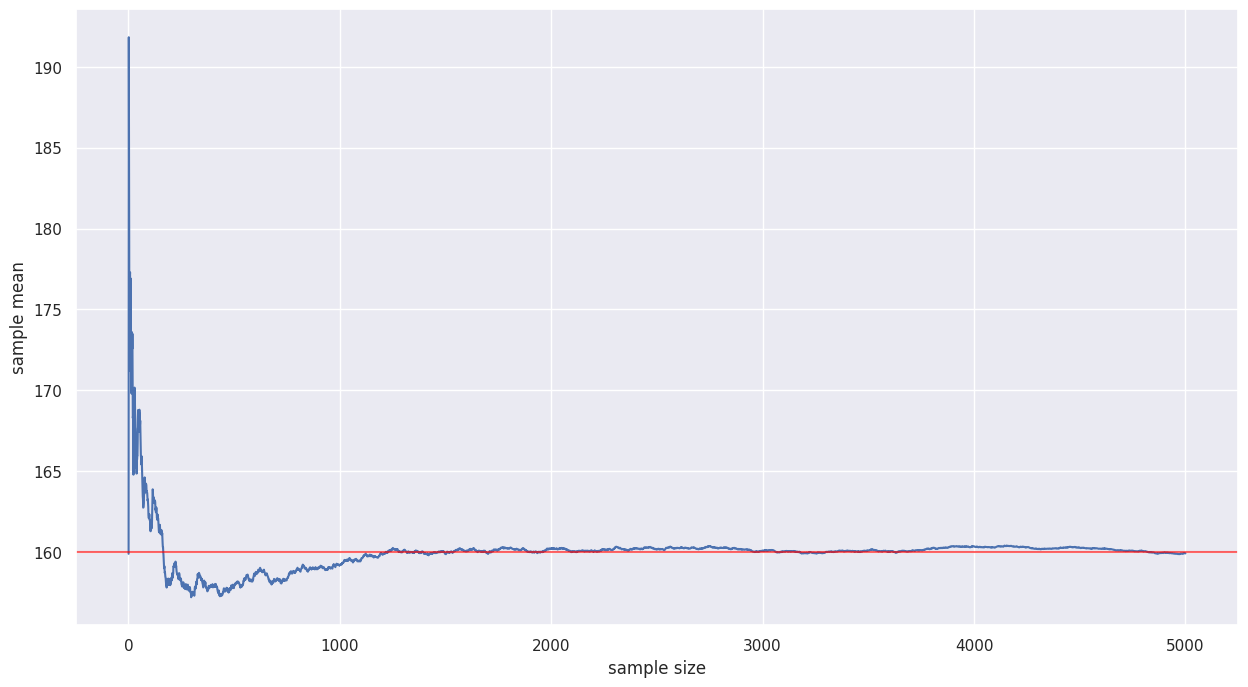

In [24]:
#draw a plot to visualize the LLN
np.random.seed(12)
n_max = 5000
sample = np.random.choice(df_mass['people_mass'],
                          size = n_max, replace = True)
sample_cumsum = np.cumsum(sample)
n_vec = np.arange(1,n_max+1) #1,2,3,...,n_max+1
sample_cumavg = sample_cumsum/n_vec
mean_pop = 160 #(optional) it can be theoretically computed.
sns.set_theme(rc = {'figure.figsize':(15, 8)})
sns.lineplot(x = n_vec, y = sample_cumavg)
plt.axhline(y = mean_pop, color = 'red', alpha = 0.6)
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.show()

- We can see that around n = 1000 we see that the sample mean of the sample mean distribution is stable around the population mean $\mu = 160$.

Feel free to run this chunk of code many times by change the seed to see whether it can converge to the population mean.
- Think about what is going on if n increases to infinity?